In [72]:

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import re

In [73]:
#Define the Path
#Amin
#DATA_PATH = r"C:\Users\amink\Desktop\Uni\HPI\2.Semester\StatisticsForCH\Studie\statistics_hpi\Experiment1\Raw_Data"
DATA_PATH = "/Users/max/Desktop/Potsdam/HPI/2_SecondSemester/7_StatisticsInConnectedHealthcare/statistics_hpi/Raw_Data"


### Visualize the Raw Data

In [74]:
#Present exact one example

#Load Data
rest_example =  pd.read_csv(DATA_PATH + "/" + "010.csv")
stress_example = pd.read_csv(DATA_PATH + "/" + "011.csv")

#Calculate the magnitude
rest_example["magnitude"] = np.sqrt(rest_example.iloc[:,1]**2+ rest_example.iloc[:,2]**2 + rest_example.iloc[:,3]**2)
stress_example["magnitude"] = np.sqrt(stress_example.iloc[:,1]**2+ stress_example.iloc[:,2]**2 + stress_example.iloc[:,3]**2)

#slice between 3 and 10 seconds
raw_vis_rest = rest_example[(rest_example["Time (s)"] > 3) & (rest_example["Time (s)"] <= 8)].copy()
raw_vis_stre = stress_example[(stress_example["Time (s)"] > 3) & (stress_example["Time (s)"] <= 8)].copy()


rest_example["Time (s)"]

0        0.002048
1        0.012074
2        0.022099
3        0.032125
4        0.042150
          ...    
1518    15.220825
1519    15.230851
1520    15.240877
1521    15.250902
1522    15.260928
Name: Time (s), Length: 1523, dtype: float64

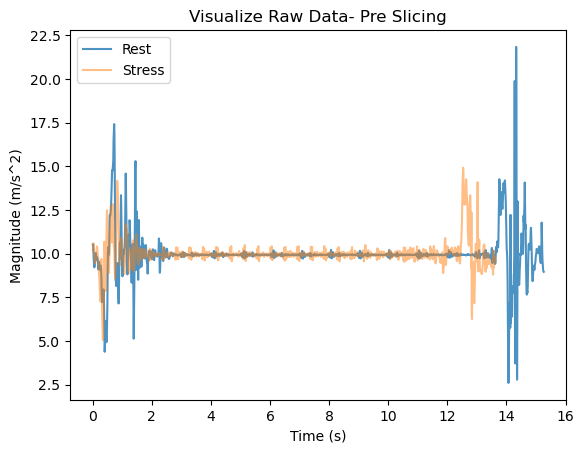

In [75]:
##Visualize Pre Slicing
plt.title("Visualize Raw Data- Pre Slicing")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude (m/s^2)")
plt.plot(rest_example["Time (s)"], rest_example["magnitude"], label="Rest", alpha = 0.8)
#plt.axhline(y=rest_example["magnitude"].mean(), color="blue", linestyle="--", label="Rest Mean")
plt.plot(stress_example["Time (s)"], stress_example["magnitude"], label="Stress", alpha = 0.5)
#plt.axhline(y=stress_example["magnitude"].mean(), color="orange", linestyle="--", label="Stress Mean")
plt.legend()  # Show legend with labels
plt.show()

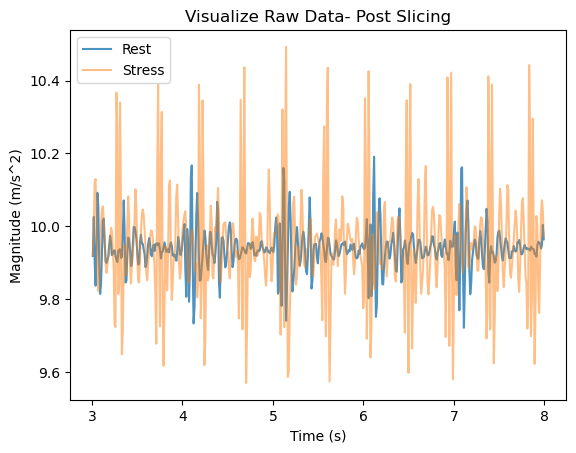

In [76]:
#Visulaize Post Slicing

plt.title("Visualize Raw Data- Post Slicing")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude (m/s^2)")
plt.plot(raw_vis_rest["Time (s)"], raw_vis_rest["magnitude"], label="Rest", alpha = 0.8)
#plt.axhline(y=raw_vis_rest["magnitude"].mean(), color="blue", linestyle="--", label="Rest Mean")
plt.plot(raw_vis_stre["Time (s)"], raw_vis_stre["magnitude"], label="Stress", alpha = 0.5)
#plt.axhline(y=raw_vis_stre["magnitude"].mean(), color="orange", linestyle="--", label="Stress Mean")
plt.legend()  # Show legend with labels
plt.show()
 

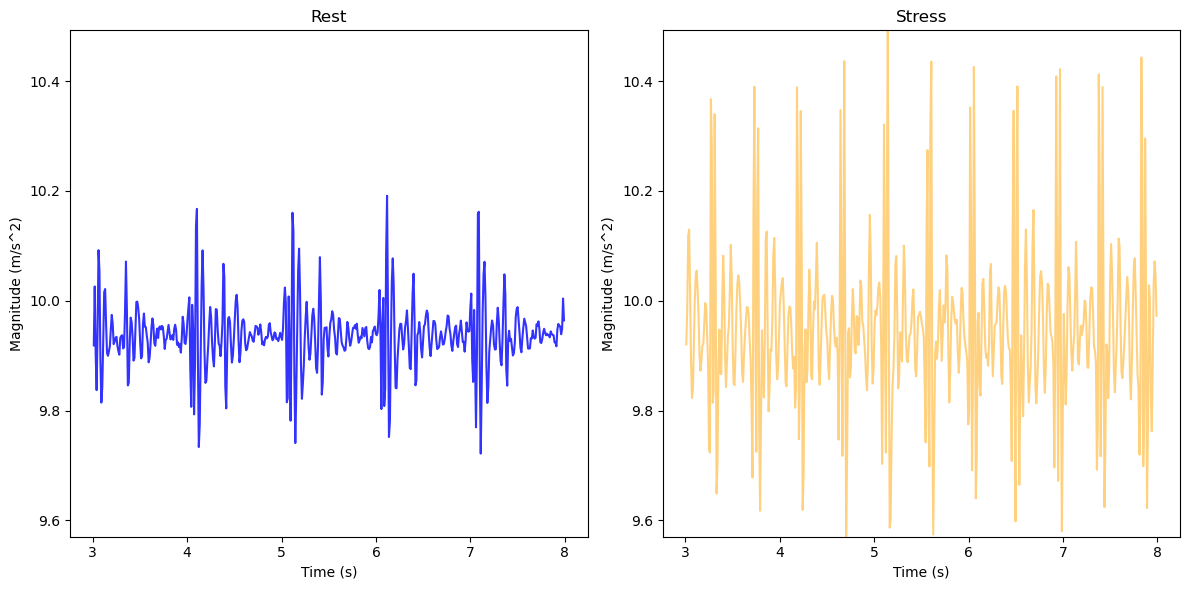

In [77]:
import matplotlib.pyplot as plt

# Calculate overall minimum and maximum values of magnitude
min_magnitude = min(raw_vis_rest["magnitude"].min(), raw_vis_stre["magnitude"].min())
max_magnitude = max(raw_vis_rest["magnitude"].max(), raw_vis_stre["magnitude"].max())

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Rest data
axes[0].plot(raw_vis_rest["Time (s)"], raw_vis_rest["magnitude"], label="Rest", color="blue", alpha=0.8)
axes[0].set_title("Rest")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Magnitude (m/s^2)")
axes[0].set_ylim(min_magnitude, max_magnitude)

# Plot for Stress data
axes[1].plot(raw_vis_stre["Time (s)"], raw_vis_stre["magnitude"], label="Stress", color="orange", alpha=0.5)
axes[1].set_title("Stress")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Magnitude (m/s^2)")
axes[1].set_ylim(min_magnitude, max_magnitude)

plt.tight_layout()
plt.show()


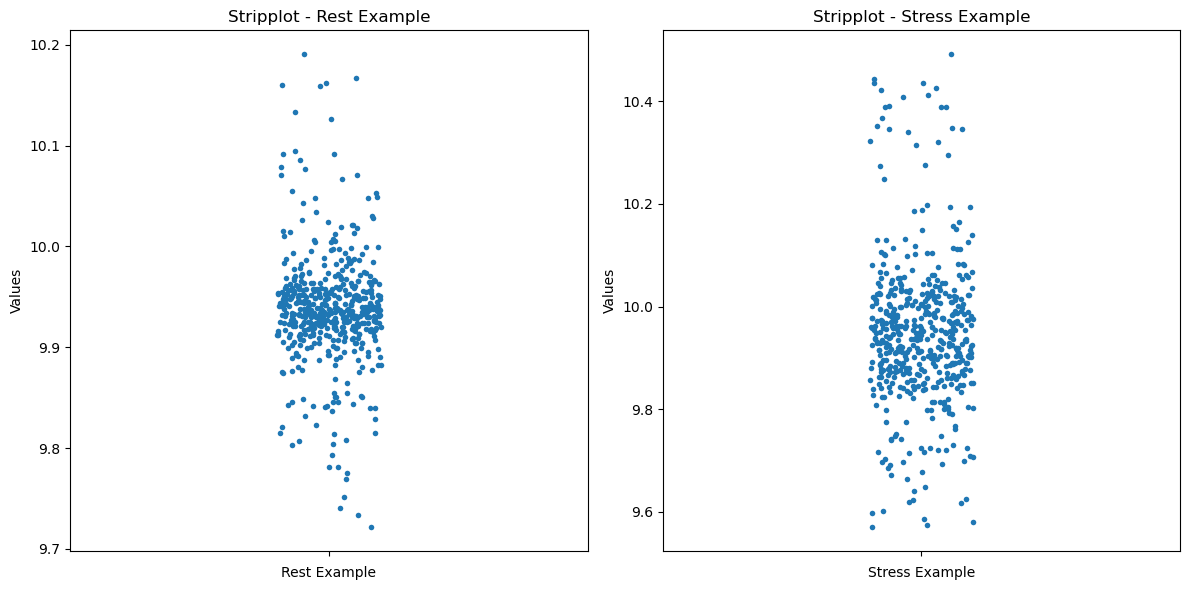

In [78]:
#Create a stripplot, presenting all single data points of one examination
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.stripplot(ax=axes[0], data=raw_vis_rest["magnitude"], size=4)
sns.stripplot(ax=axes[1], data=raw_vis_stre["magnitude"], size=4)

axes[0].set_xlabel('Rest Example')
axes[1].set_xlabel('Stress Example')
axes[0].set_ylabel('Values')
axes[1].set_ylabel('Values')
axes[0].set_title('Stripplot - Rest Example')
axes[1].set_title('Stripplot - Stress Example')

plt.tight_layout()
plt.show()
